In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part IV Problem 1 - Linear Regression

In [2]:
# Given data
X = [6, 35, 77, 4, 27, 7, 16, 61, 14, 84, 91, 30, 72, 12, 77, 80, 4, 48, 90, 95]
Y = [105, 117, 128, 101, 113, 104, 106, 123, 103, 138, 132, 108, 129, 108, 128, 130, 95, 108, 143, 137]

In [66]:
# Calculate the mean of X and Y
mean_X = sum(X) / len(X)
mean_Y = sum(Y) / len(Y)

In [67]:
# Calculate the numerator and denominator
numerator = sum((x - mean_X) * (y - mean_Y) for x, y in zip(X, Y))
denominator = sum((x - mean_X) ** 2 for x in X)

# Calculate the desired value
result = numerator / denominator

# Print the result
print(result)

0.4037571345108085


In [68]:
# Calculate the regression line
m, b = np.polyfit(X, Y, 1)

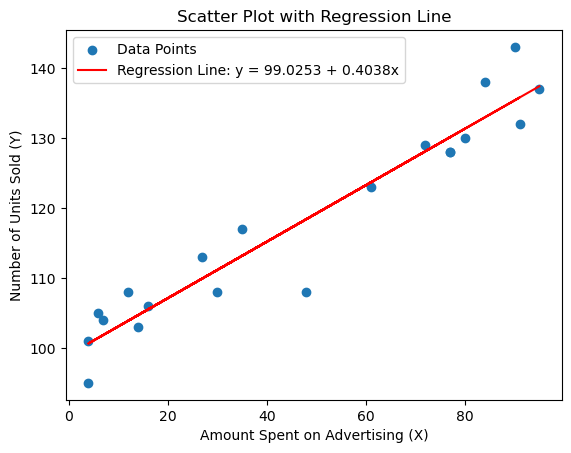

In [69]:
# Create scatter plot
plt.scatter(X, Y, label='Data Points')

#Plot the regression line
plt.plot(X, m * np.array(X) + b, color='red', label=f'Regression Line: y = {b:.4f} + {m:.4f}x')

plt.xlabel('Amount Spent on Advertising (X)')
plt.ylabel('Number of Units Sold (Y)')
plt.title('Scatter Plot with Regression Line')

# Show legend
plt.legend()

# Display the plot
plt.show()

# Part IV Problem 2 - Naive Bayes

In [70]:
from fractions import Fraction

data = {
    'Age': [0, 0, -1, 1, 1, 1, -1, 0, 0, 1, 0, -1, -1, 1],
    'Credit_Limit': [-1, -1, -1, 0, 1, 1, 1, 0, 1, 0, 0, 0, -1, 0],
    'Employed': [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
    'Sex': [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
    'Buy': [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]
}

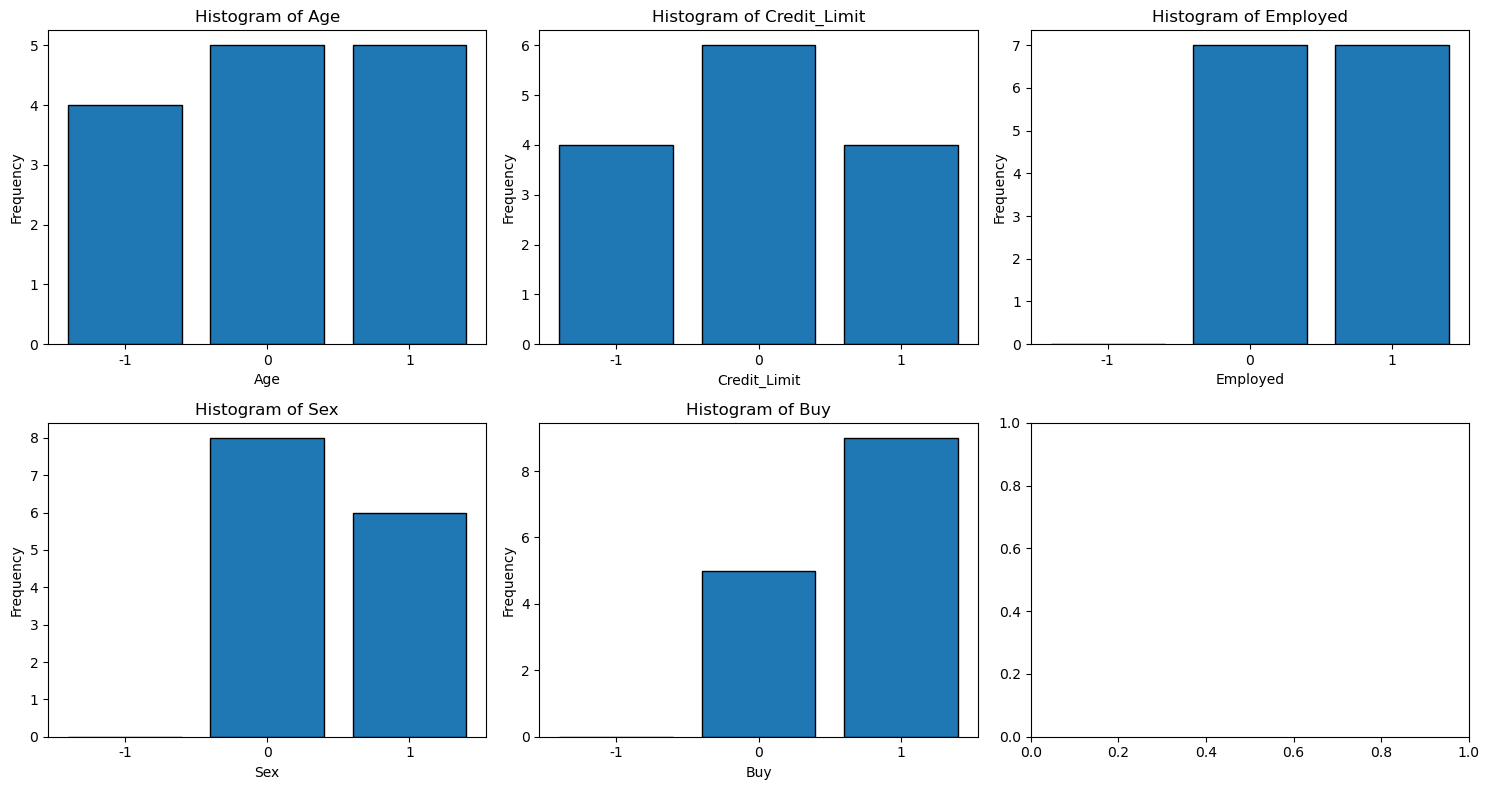

In [71]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # Adjust the width and height as needed

# Loop through each feature and plot a histogram in the appropriate subplot
for i, feature in enumerate(data.keys()):
    row = i // 3  # Determine the row based on the index
    col = i % 3   # Determine the column based on the index
    axes[row, col].hist(data[feature], bins=[-1.5, -0.5, 0.5, 1.5], edgecolor='black', align='mid', rwidth=0.8)
    axes[row, col].set_title(f'Histogram of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xticks([-1, 0, 1])
    axes[row, col].set_xticklabels(['-1', '0', '1'])
    
# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the subplotsnow 
plt.show()

In [72]:
# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the prior probability
prior_probability = Fraction(df['Buy'].sum() , len(df['Buy']))

print("Prior Probability of Buying:", prior_probability)

Prior Probability of Buying: 9/14


In [73]:

# New customer data
new_customer = {
    'Age': 0,
    'Credit_Limit': 1,
    'Employed': 0,
    'Sex': 1
}


In [74]:
# Calculate the prior probabilities
prior_buy_1 = Fraction(df['Buy'].sum(), len(df['Buy']))
prior_buy_0 = Fraction(len(df['Buy']) - df['Buy'].sum(), len(df['Buy']))

In [75]:
# Calculate the likelihoods
likelihood_buy_1 = 1
likelihood_buy_0 = 1
for feature, value in new_customer.items():
    likelihood_buy_1 *= Fraction(df[df['Buy'] == 1][feature].eq(value).sum(), df['Buy'].sum())
    likelihood_buy_0 *= Fraction(df[df['Buy'] == 0][feature].eq(value).sum(), len(df['Buy']) - df['Buy'].sum())

In [76]:

# Calculate the proportional probabilities
proportional_probability_buy_1 = likelihood_buy_1 * prior_buy_1
proportional_probability_buy_0 = likelihood_buy_0 * prior_buy_0

In [77]:
# Print the results
print("Proportional Probability of Buying (Buy = 1):", proportional_probability_buy_1)
print("Proportional Probability of Buying (Buy = 0):", proportional_probability_buy_0)

Proportional Probability of Buying (Buy = 1): 1/189
Proportional Probability of Buying (Buy = 0): 18/875


In [78]:
# 16/1701 = 0.009 406 231 628
# 18/875 = 0.020 571 428 57

In [79]:
# Calculate the sum of the proportional probabilities
sum_proportional_probabilities = proportional_probability_buy_1 + proportional_probability_buy_0

# Calculate the normalized posterior probabilities
posterior_probability_buy_1 = proportional_probability_buy_1 / sum_proportional_probabilities
posterior_probability_buy_0 = proportional_probability_buy_0 / sum_proportional_probabilities

# Print the posterior probabilities
print("Posterior Probability of Buying (Buy = 1):", posterior_probability_buy_1)
print("Posterior Probability of Buying (Buy = 0):", posterior_probability_buy_0)

Posterior Probability of Buying (Buy = 1): 125/611
Posterior Probability of Buying (Buy = 0): 486/611


In [29]:
# 1000/ 3187 = 0.313 774 709 8
# 2187 / 3187 = 0.686 225 290 2

# Part IV Problem 3 - Probs

In [30]:
# Given probabilities
P_A = 0.25
P_A_and_B = 0.15

# Calculate P(B')
P_B_complement = 1 - P_A_and_B

# Calculate P(B)
P_B = 1 - P_B_complement

# Print the result
print("Probability that Samsung launches a product (P(B)):", P_B)

Probability that Samsung launches a product (P(B)): 0.15000000000000002
